***Парсинг сайта pk.mpei.ru и анализ конкурсной ситуации на магистратуре ПМИ***



In [4]:
import pandas as pd
# Выгружаем табличку с сайта в фрейм
url = r'https://pk.mpei.ru/inform/list95magc.html'
tables = pd.read_html(url)
competition_PMI_table = tables[0]
competition_PMI_table.head()

СНИЛС или Рег.номер  Сумма Сумма без ИД Баллы ВИ*  ИД Преимущ. право**  \
  СНИЛС или Рег.номер  Сумма Сумма без ИД ВИ в маг.  ИД        ч.9 ст.71   
0  СНИЛС: 16680243375  138.0         59.0      59.0  79              нет   
1  СНИЛС: 13635386368  136.0         89.0      89.0  47              нет   
2  СНИЛС: 16386557710  124.0         92.0      92.0  32              нет   
3  СНИЛС: 17136816066  121.0         82.0      82.0  39              нет   
4  СНИЛС: 16236773578  121.0         77.0      77.0  44              нет   

             Оригинал Договор Приоритет Приоритет высший Общежитие  \
  ч.10 ст.71 Оригинал Договор Приоритет Приоритет высший Общежитие   
0        нет      нет     нет         2              нет       б/о   
1        нет       да     нет         1               да       б/о   
2        нет       да     нет         1               да       б/о   
3        нет      нет     нет         1              нет       б/о   
4        нет       да     нет         2              нет       б/о   

                Примечание  
                Примечание  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4  Зачисляется в другой КГ

In [5]:
# Чистим дублирующиеся параметры и/или не нужные
competition_PMI_table = competition_PMI_table.drop(['Сумма без ИД','Оригинал','Договор','Примечание','Приоритет высший','Преимущ. право**'],axis=1)
competition_PMI_table.head()

<ipython-input-5-1f0bb97acd68>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  competition_PMI_table = competition_PMI_table.drop(['Сумма без ИД','Оригинал','Договор','Примечание','Приоритет высший','Преимущ. право**'],axis=1)


,СНИЛС или Рег.номер,Сумма,Баллы ВИ*,ИД,Приоритет,Общежитие
,СНИЛС или Рег.номер,Сумма,ВИ в маг.,ИД,Приоритет,Общежитие
0,СНИЛС: 16680243375,138.0,59.0,79,2,б/о
1,СНИЛС: 13635386368,136.0,89.0,47,1,б/о
2,СНИЛС: 16386557710,124.0,92.0,32,1,б/о
3,СНИЛС: 17136816066,121.0,82.0,39,1,б/о
4,СНИЛС: 16236773578,121.0,77.0,44,2,б/о


In [6]:
# Изменяем названия столбцов в табличке на более простые
competition_PMI_table.columns = ['СНИЛС', 'СУММА', 'ВИ', 'ИД', 'Приоритет','Общежитие']
competition_PMI_table.head()

,СНИЛС,СУММА,ВИ,ИД,Приоритет,Общежитие
0,СНИЛС: 16680243375,138.0,59.0,79,2,б/о
1,СНИЛС: 13635386368,136.0,89.0,47,1,б/о
2,СНИЛС: 16386557710,124.0,92.0,32,1,б/о
3,СНИЛС: 17136816066,121.0,82.0,39,1,б/о
4,СНИЛС: 16236773578,121.0,77.0,44,2,б/о


In [7]:
# Итерирование по столбцу 'СНИЛС' и изменение значений на исключительно численные
for index, value in competition_PMI_table['СНИЛС'].items():
    if value.startswith('СНИЛС: '):
        new_value = value.replace('СНИЛС: ', '')
        competition_PMI_table.at[index, 'СНИЛС'] = new_value
    elif value.startswith('Рег.номер: '):
        new_value = value.replace('Рег.номер: ', '')
        competition_PMI_table.at[index, 'СНИЛС'] = new_value


competition_PMI_table['СНИЛС'] = competition_PMI_table['СНИЛС'].astype(int)
competition_PMI_table.head()

,СНИЛС,СУММА,ВИ,ИД,Приоритет,Общежитие
0,16680243375,138.0,59.0,79,2,б/о
1,13635386368,136.0,89.0,47,1,б/о
2,16386557710,124.0,92.0,32,1,б/о
3,17136816066,121.0,82.0,39,1,б/о
4,16236773578,121.0,77.0,44,2,б/о


In [8]:
# Итерирование по столбцу 'Общежитие' и изменение значений на исключительно численные
# 1 - необходимо общежитие.
# 0 - общежитие не нужно.
competition_PMI_table['Общежитие'] = competition_PMI_table['Общежитие'].replace({'б/о': 0, 'с/о': 1}).astype(int)
competition_PMI_table.head()

,СНИЛС,СУММА,ВИ,ИД,Приоритет,Общежитие
0,16680243375,138.0,59.0,79,2,0
1,13635386368,136.0,89.0,47,1,0
2,16386557710,124.0,92.0,32,1,0
3,17136816066,121.0,82.0,39,1,0
4,16236773578,121.0,77.0,44,2,0


In [9]:
competition_PMI_table.describe()

,СНИЛС,СУММА,ВИ,ИД,Приоритет,Общежитие
count,2.790000e+02,136.000000,139.000000,279.000000,279.000000,279.000000
mean,1.690719e+10,78.382353,72.302158,4.197133,1.709677,0.387097
std,2.261895e+09,21.038610,19.987190,9.552234,1.124425,0.487961
min,1.202038e+06,26.000000,11.000000,0.000000,1.000000,0.000000
25%,1.589253e+10,68.000000,60.500000,0.000000,1.000000,0.000000
50%,1.692532e+10,82.000000,79.000000,0.000000,1.000000,0.000000
75%,1.845470e+10,91.000000,88.000000,4.000000,2.000000,1.000000
max,2.218049e+10,138.000000,97.000000,79.000000,11.000000,1.000000



*   279 человек подали документы
*   Из них 39% человек нуждаются в общежитии
*   Конкурс 5 человек на место

In [10]:
# Количество людей сдавших экзамен
print(len(competition_PMI_table[competition_PMI_table['СУММА'].notnull()]))
df = competition_PMI_table[competition_PMI_table['СУММА'].notnull()] # Список студентов сдавших экзамен

136


Общее количество сдавших* экзамен - 136

Количество абитуриентов сдавших* во вторую волну экзамен - 41

Количество абитуриентов сдавших* во вторую волну экзамен - 95

*Абитуриент набрал более 25 баллов

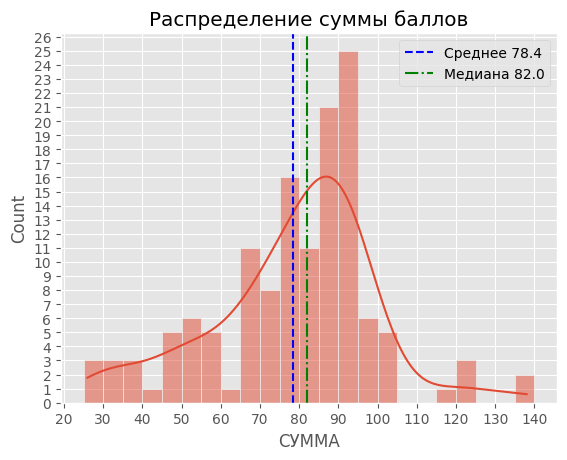

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")


mean_value = competition_PMI_table['СУММА'].mean().round(1)
median_value = competition_PMI_table['СУММА'].median()


# Визуализируем распределение баллов
sns.histplot(data=df,x='СУММА',kde=True,bins=range(25, 145, 5))
plt.axvline(mean_value, color='b', linestyle='--', label=f'Среднее {mean_value}')
plt.axvline(median_value, color='g', linestyle='-.', label=f'Медиана {median_value}')
plt.locator_params (axis='x', nbins= 20)
plt.locator_params (axis='y', nbins= 30)
plt.legend()
plt.title('Распределение суммы баллов')
plt.show()

*Первая волна*:

 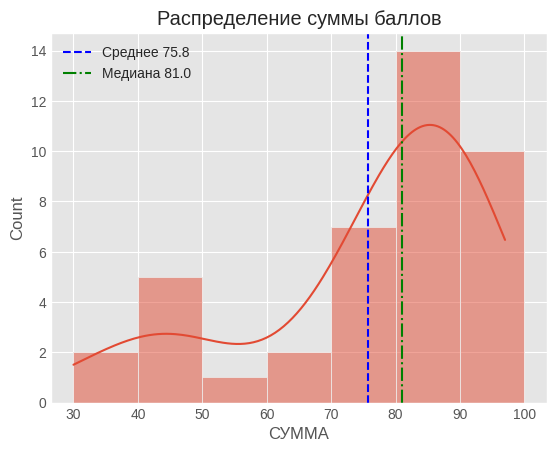

Распределение незначительно сместилось вправо, это говорит о том, что разницы между среднестатистическим сдающим в 1 волну и 2 волну нет.

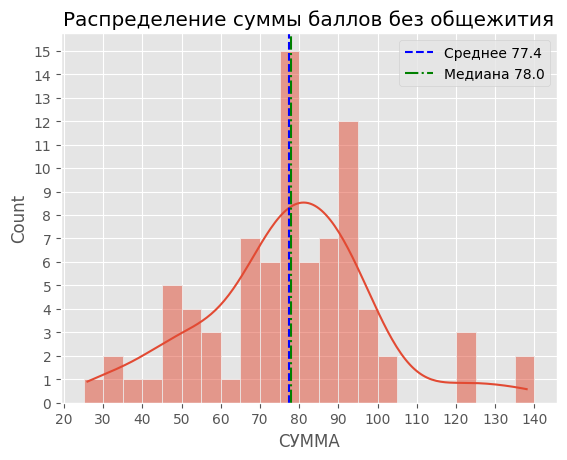

In [13]:
filtered = df[df['Общежитие'] == 0]
mean_value = filtered['СУММА'].mean().round(1)
median_value = filtered['СУММА'].median()

sns.histplot(data=filtered,x='СУММА',kde=True,bins=range(25, 145, 5))
plt.axvline(mean_value, color='b', linestyle='--', label=f'Среднее {mean_value}')
plt.axvline(median_value, color='g', linestyle='-.', label=f'Медиана {median_value}')
plt.locator_params (axis='x', nbins= 20)
plt.locator_params (axis='y', nbins= 30)
plt.legend()
plt.title('Распределение суммы баллов без общежития')
plt.show()

*Первая волна:*

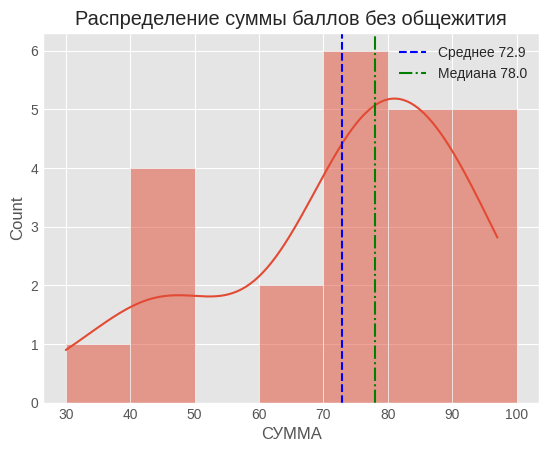

Изменения незначительны


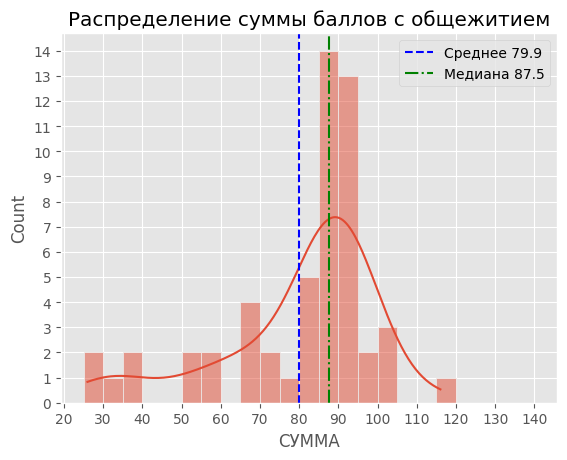

In [ ]:
filtered = df[df['Общежитие'] == 1]
mean_value = filtered['СУММА'].mean().round(1)
median_value = filtered['СУММА'].median()

sns.histplot(data=filtered,x='СУММА',bins=range(25, 145, 5),kde=True)
plt.axvline(mean_value, color='b', linestyle='--', label=f'Среднее {mean_value}')
plt.axvline(median_value, color='g', linestyle='-.', label=f'Медиана {median_value}')
plt.locator_params (axis='x', nbins= 20)
plt.locator_params (axis='y', nbins= 20)
plt.legend()
plt.title('Распределение суммы баллов с общежитием')
plt.show()

*Первая волна:*

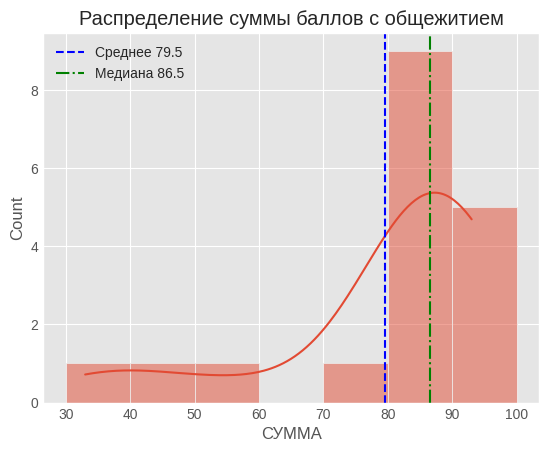

Изменения незначительны

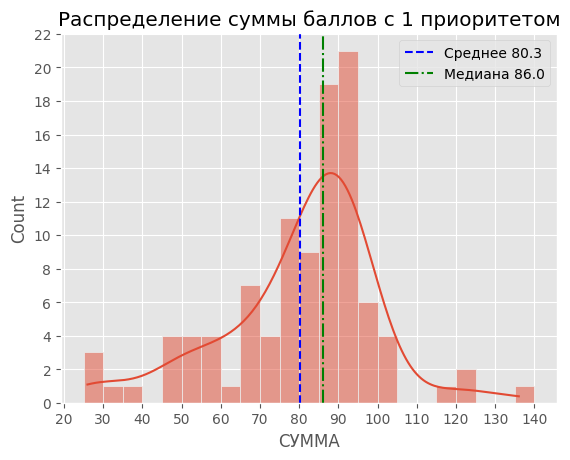

In [ ]:
filtered = df[df['Приоритет'] == 1]
mean_value = filtered['СУММА'].mean().round(1)
median_value = filtered['СУММА'].median()
sns.histplot(data=filtered,x='СУММА',bins=range(25, 145, 5),kde=True)
plt.axvline(mean_value, color='b', linestyle='--', label=f'Среднее {mean_value}')
plt.axvline(median_value, color='g', linestyle='-.', label=f'Медиана {median_value}')
plt.locator_params (axis='x', nbins= 20)
plt.locator_params (axis='y', nbins= 20)
plt.legend()
plt.title('Распределение суммы баллов с 1 приоритетом')
plt.show()

*Первая волна:*

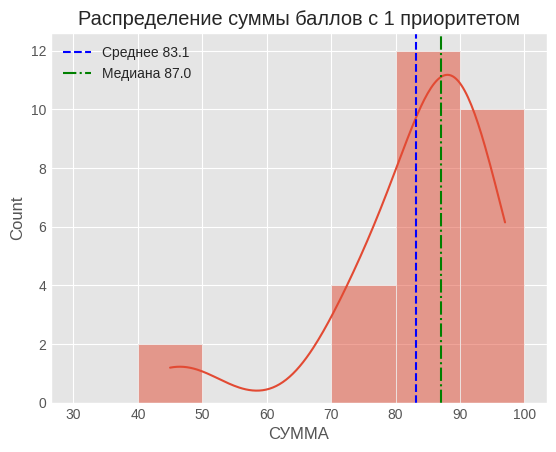

Изменения незначительны

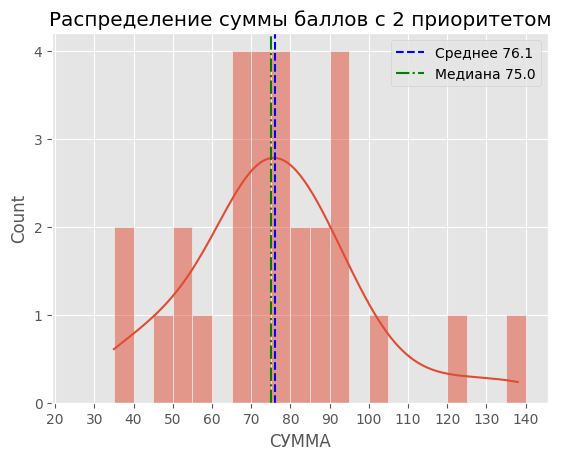

In [ ]:
filtered = df[df['Приоритет'] == 2]
mean_value = filtered['СУММА'].mean().round(1)
median_value = filtered['СУММА'].median()
sns.histplot(data=filtered,x='СУММА',bins=range(25, 145, 5),kde=True)
plt.axvline(mean_value, color='b', linestyle='--', label=f'Среднее {mean_value}')
plt.axvline(median_value, color='g', linestyle='-.', label=f'Медиана {median_value}')
plt.locator_params (axis='x', nbins= 20)
plt.locator_params (axis='y', nbins= 6)
plt.legend()
plt.title('Распределение суммы баллов с 2 приоритетом')
plt.show()

*Первая волна:*

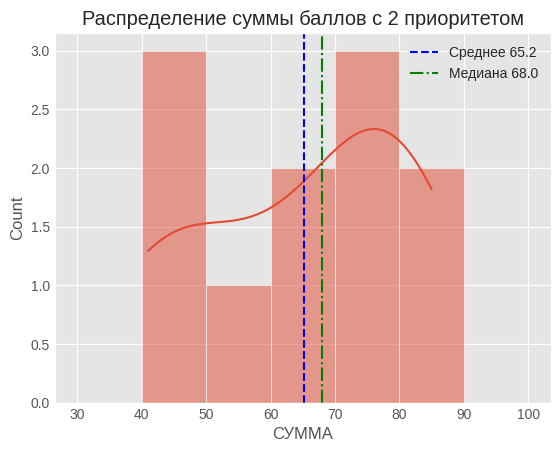

А вот тут интересно, люди со вторым приоритетом в 1-ю волну написали хуже в среднем на 10 баллов.


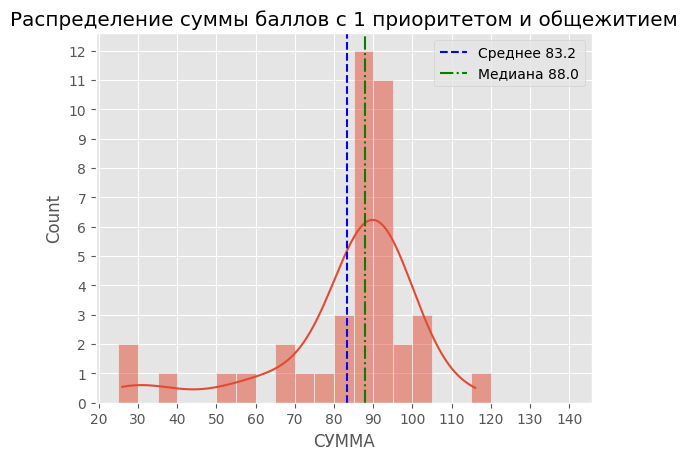

In [14]:
filtered = df[(df['Приоритет'] == 1 )&(df['Общежитие'] == 1)]
mean_value = filtered['СУММА'].mean().round(1)
median_value = filtered['СУММА'].median()
sns.histplot(data=filtered,x='СУММА',bins=range(25, 145, 5),kde=True)
plt.axvline(mean_value, color='b', linestyle='--', label=f'Среднее {mean_value}')
plt.axvline(median_value, color='g', linestyle='-.', label=f'Медиана {median_value}')
plt.locator_params (axis='x', nbins= 20)
plt.locator_params (axis='y', nbins= 20)
plt.legend()
plt.title('Распределение суммы баллов с 1 приоритетом и общежитием')
plt.show()

*Первая волна*

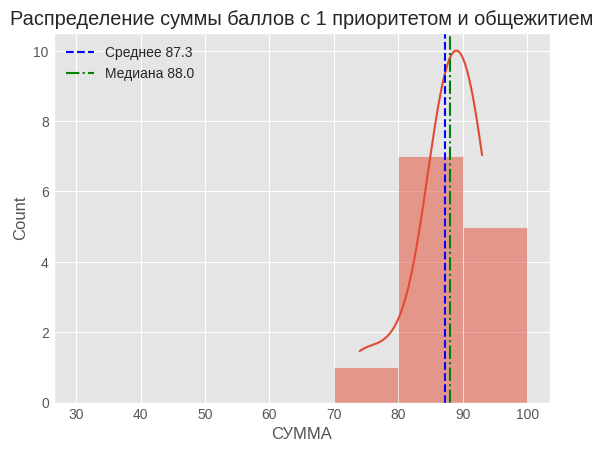

Незначительные изменения

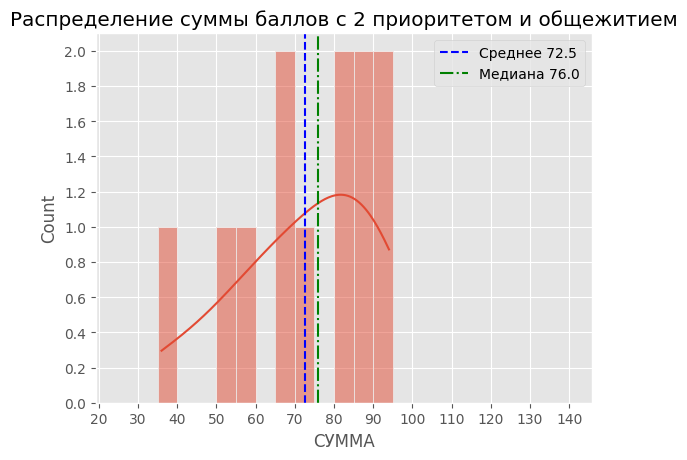

In [ ]:
filtered = df[(df['Приоритет'] == 2 )&(df['Общежитие'] == 1)]
mean_value = filtered['СУММА'].mean().round(1)
median_value = filtered['СУММА'].median()
sns.histplot(data=filtered,x='СУММА',bins=range(25, 145, 5),kde=True)
plt.axvline(mean_value, color='b', linestyle='--', label=f'Среднее {mean_value}')
plt.axvline(median_value, color='g', linestyle='-.', label=f'Медиана {median_value}')
plt.locator_params (axis='x', nbins= 20)
plt.locator_params (axis='y', nbins= 20)
plt.legend()
plt.title('Распределение суммы баллов с 2 приоритетом и общежитием')
plt.show()

*Первая волна*

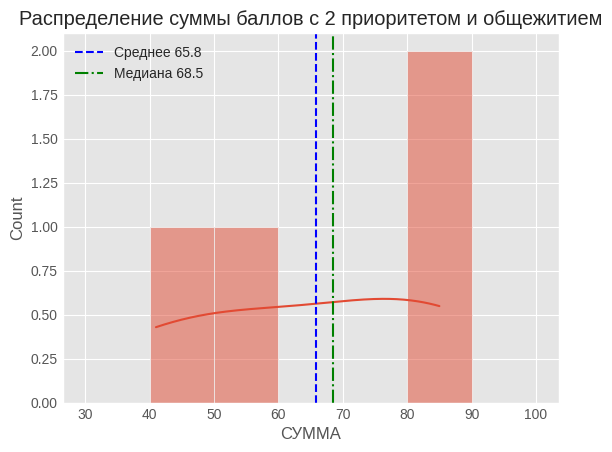

Похожая ситуация, просадка на 7 баллов 1 волны по сравнению со 2.

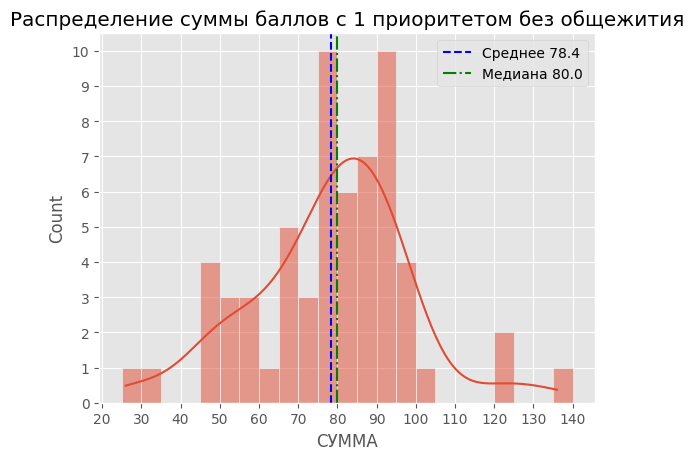

In [ ]:
filtered = df[(df['Приоритет'] == 1 )&(df['Общежитие'] == 0)]
mean_value = filtered['СУММА'].mean().round(1)
median_value = filtered['СУММА'].median()
sns.histplot(data=filtered,x='СУММА',bins=range(25, 145, 5),kde=True)
plt.axvline(mean_value, color='b', linestyle='--', label=f'Среднее {mean_value}')
plt.axvline(median_value, color='g', linestyle='-.', label=f'Медиана {median_value}')
plt.locator_params (axis='x', nbins= 20)
plt.locator_params (axis='y', nbins= 20)
plt.legend()
plt.title('Распределение суммы баллов с 1 приоритетом без общежития')
plt.show()

*Первая волна*

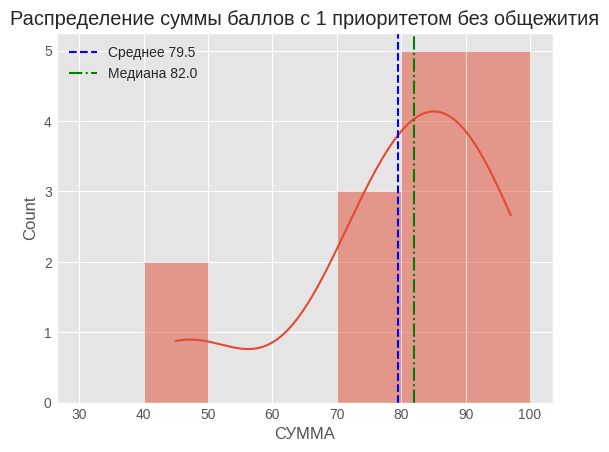

Незначительные изменения

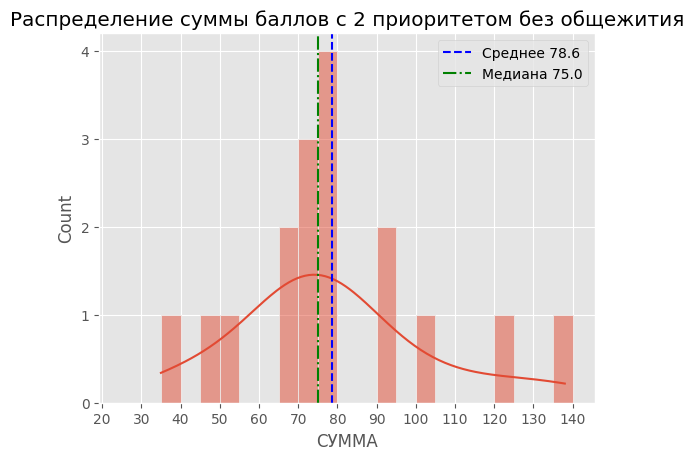

In [ ]:
filtered = df[(df['Приоритет'] == 2 )&(df['Общежитие'] == 0)]
mean_value = filtered['СУММА'].mean().round(1)
median_value = filtered['СУММА'].median()
sns.histplot(data=filtered,x='СУММА',bins=range(25, 145, 5),kde=True)
plt.axvline(mean_value, color='b', linestyle='--', label=f'Среднее {mean_value}')
plt.axvline(median_value, color='g', linestyle='-.', label=f'Медиана {median_value}')
plt.locator_params (axis='x', nbins= 20)
plt.locator_params (axis='y', nbins= 6)
plt.legend()
plt.title('Распределение суммы баллов с 2 приоритетом без общежития')
plt.show()

*Первая волна:*

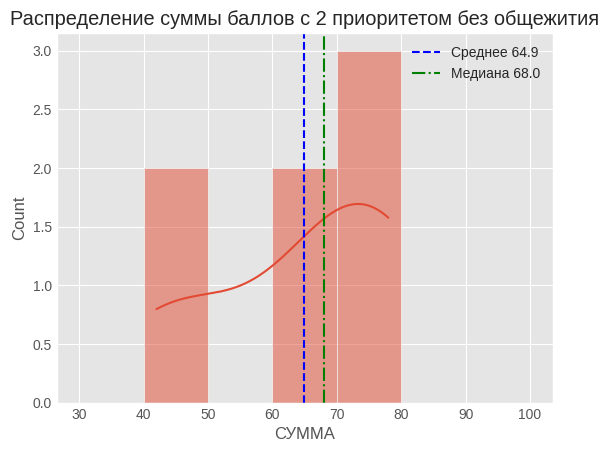

Просадка аж на 14 баллов

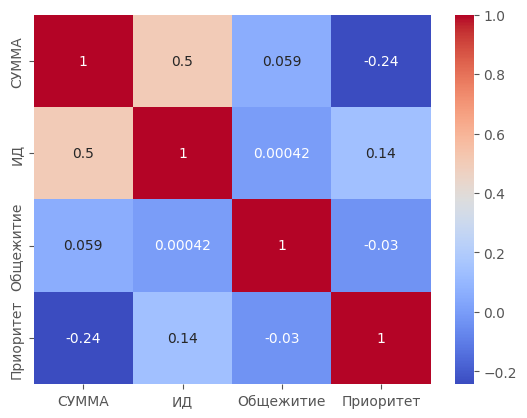

In [ ]:
corr_matrix = df[['СУММА','ИД','Общежитие', 'Приоритет']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Наблюдения
*   Наблюдается относительно средняя корреляция между ИД и суммой баллов по вступительным испытаниям. В т.ч. чем больше ИД, тем выше баллы у абитуриента.
*   Слабая корреляция между ИД и приоритетом, а также между суммой баллов и приоритетом.
* Корреляция отсутствует в остальных комбинациях.


*Первая волна:*

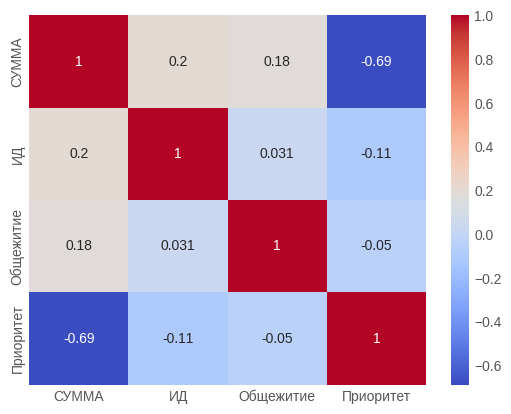

* Влияние ИД усилилось во второй волне.
* Приоритет из сильной корреляции с баллами перешел в слабую позицию, потребность в общежитии вообще перестала коррелировать с баллами.
* Корреляция ИД и Приоритета изменилась на обратную, чем выше приоритет тем ниже ИД и наооборот.